In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv("C:\\Users\\amres\\Desktop\\capstone project\\OnlineRetail (3).csv",encoding = 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
#data cleaning
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [5]:
print(df.shape)


(541909, 8)


In [6]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df = df.dropna()


In [8]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB
None
(406829, 8)


In [9]:
print('Duplicate entries: {}'.format(df.duplicated().sum()))
print('{}% rows are duplicate.'.format(round((df.duplicated().sum()/df.shape[0])*100),2))


Duplicate entries: 5225
1% rows are duplicate.


In [10]:
df.drop_duplicates(inplace = True)

In [11]:
print(df.shape)

(401604, 8)


In [12]:
 df.Country.value_counts().reset_index().head(20)

,index,Country
0,United Kingdom,356728
1,Germany,9480
2,France,8475
3,EIRE,7475
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1471
9,Australia,1258


In [13]:
print("Data Shape", df.shape)
for col in ["InvoiceNo","StockCode","InvoiceDate","CustomerID", "Country"]:
    print("Unique Values for ", col, " - ", df[col].nunique())

Data Shape (401604, 8)
Unique Values for  InvoiceNo  -  22190
Unique Values for  StockCode  -  3684
Unique Values for  InvoiceDate  -  20460
Unique Values for  CustomerID  -  4372
Unique Values for  Country  -  37


In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [15]:
df['CustomerID'] = df['CustomerID'].astype(str)


In [16]:
df['Amount'] = df['Quantity']*df['UnitPrice']


In [17]:
RFM_M = df.groupby('CustomerID')['Amount'].sum()
RFM_M=RFM_M.reset_index()
RFM_M.columns = ['CustomerID', 'Amount']
print(RFM_M)

     CustomerID   Amount
0       12346.0     0.00
1       12347.0  4310.00
2       12348.0  1797.24
3       12349.0  1757.55
4       12350.0   334.40
...         ...      ...
4367    18280.0   180.60
4368    18281.0    80.82
4369    18282.0   176.60
4370    18283.0  2045.53
4371    18287.0  1837.28

[4372 rows x 2 columns]


In [18]:
RFM_F = df.groupby('CustomerID')['InvoiceNo'].count()
RFM_F = RFM_F.reset_index()
RFM_F.columns = ['CustomerID', 'Frequency']
print(RFM_F)

     CustomerID  Frequency
0       12346.0          2
1       12347.0        182
2       12348.0         31
3       12349.0         73
4       12350.0         17
...         ...        ...
4367    18280.0         10
4368    18281.0          7
4369    18282.0         13
4370    18283.0        721
4371    18287.0         70

[4372 rows x 2 columns]


In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
max_date = max(df['InvoiceDate'])
df['Diff'] = max_date - df['InvoiceDate']
RFM_R = df.groupby('CustomerID')['Diff'].min()
RFM_R = RFM_R.reset_index()
RFM_R.columns = ['CustomerID','Diff']
RFM_R['Diff'] = RFM_R['Diff'].dt.days
print(RFM_R)
    

     CustomerID  Diff
0       12346.0   325
1       12347.0     1
2       12348.0    74
3       12349.0    18
4       12350.0   309
...         ...   ...
4367    18280.0   277
4368    18281.0   180
4369    18282.0     7
4370    18283.0     3
4371    18287.0    42

[4372 rows x 2 columns]


In [20]:
RFM = pd.merge(RFM_M,RFM_F,on='CustomerID',how='inner')
RFM = pd.merge(RFM,RFM_R,on='CustomerID',how='inner')
RFM.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
print(RFM.head())

  CustomerID   Amount  Frequency  Recency
0    12346.0     0.00          2      325
1    12347.0  4310.00        182        1
2    12348.0  1797.24         31       74
3    12349.0  1757.55         73       18
4    12350.0   334.40         17      309


In [21]:
Q1 = RFM.Amount.quantile(0.05)
Q3 =RFM.Amount.quantile(0.95)
IQR = Q3 - Q1
RFM = RFM[(RFM.Amount >= Q1 - 1.5*IQR) & (RFM.Amount <= Q3 + 1.5*IQR)]

Q1 = RFM.Recency.quantile(0.05)
Q3 = RFM.Recency.quantile(0.95)
IQR = Q3 - Q1
RFM = RFM[(RFM.Recency >= Q1 - 1.5*IQR) & (RFM.Recency <= Q3 + 1.5*IQR)]

Q1 = RFM.Frequency.quantile(0.05)
Q3 = RFM.Frequency.quantile(0.95)
IQR = Q3 - Q1
RFM = RFM[(RFM.Frequency >= Q1 - 1.5*IQR) & (RFM.Frequency <= Q3 + 1.5*IQR)]

In [22]:
print(RFM.shape)

(4295, 4)


In [23]:
#scaling
from sklearn.preprocessing import MinMaxScaler
X = RFM[['Amount', 'Frequency', 'Recency']]
scaler = MinMaxScaler()
RFM_scaled = scaler.fit_transform(X)

In [24]:
RFM_scaled = pd.DataFrame(RFM_scaled)
RFM_scaled.columns = ['Amount', 'Frequency', 'Recency']
RFM_scaled.head()

,Amount,Frequency,Recency
0,0.238663,0.001381,0.871314
1,0.478571,0.250000,0.002681
2,0.338703,0.041436,0.198391
3,0.336494,0.099448,0.048257
4,0.257277,0.022099,0.828418


In [25]:
#model creation
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(RFM_scaled)
lbs = kmeans.labels_
print(kmeans.labels_)

[1 2 0 ... 0 2 0]


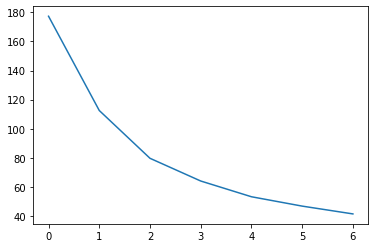

In [26]:
#wss
wss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(RFM_scaled)
    wss.append(kmeans.inertia_)
    
plt.plot(wss)

In [27]:
from sklearn.metrics import silhouette_score

In [28]:
#silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(RFM_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(RFM_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.591409399898793
For n_clusters=3, the silhouette score is 0.5490316698362174
For n_clusters=4, the silhouette score is 0.5056974994465954
For n_clusters=5, the silhouette score is 0.450156572126342
For n_clusters=6, the silhouette score is 0.40591238044414985
For n_clusters=7, the silhouette score is 0.3881814007754968
For n_clusters=8, the silhouette score is 0.39059942438182443


In [31]:
# kmeans = KMeans(n_clusters=3, max_iter=50)
# kmeans.fit(rfm_ds_scaled)
# print(kmeans.labels_)
RFM['Cluster_Id'] = lbs
RFM.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

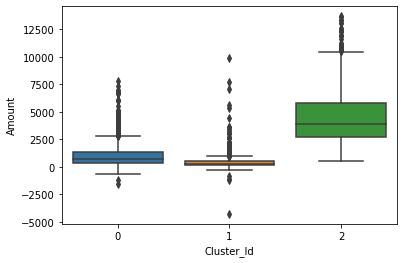

In [33]:
sns.boxplot(x='Cluster_Id', y='Amount', data=RFM)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

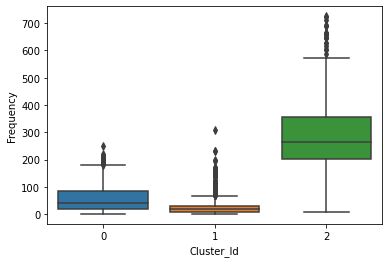

In [34]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=RFM)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

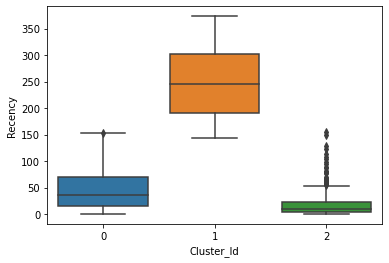

In [35]:
sns.boxplot(x='Cluster_Id', y='Recency', data=RFM)